# Uber | Dynamic City

###### Xiangyu Li (xl1535 | N17355057)

###### Final Project for Data Bootcamp, Spring 2018

### Background

Traffic condition is usually related to the bustling degree of a city and the traffic flow can somehow reflect the density of population of the city. Meanwhile, whatever going on and off duty or going for an outing, travelling is closely linked with our life. If we got the data about when and where people went, we might sumerize the pace of this city. 

In contemporary society, uber became more and more popular, especially in New York City, United State. And the record of uber can reflect the travel path of local people. And most of local citizens are audience objectives of uber. So I am going to focus on New York City and explore this dynamic city in a unique way.

### Data source

I would like to use the official raw data provided from Uber company. However, in a sense, it is illegal for the company to disclose those data to the public regarding to private record. So it will be extremely hard to get the compelte official data sheet. Luckily, I found the uber raw data in FiveThirtyEight, sometimes referred to as 538, is a famous website that focuses on opinion poll analysis, politics, economics, and sports blogging. And data from FiveThirtyEight were always used as evidence in various reports and been labeled as dependable data.

The dataset I found is the uber record in Septemper of 2014 in New York City, which contains the basic infomation like the time and location of every single trip. The total number of record is 1,028,136. url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv'



### Libraries and API

Of the packages discussed in class, I will be using:

    • Pandas to create dataframes
    • numpy for computations
    • matplotlib to graph data
    • Seaborn to create statistical visualizations

In [32]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Importing Data

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv'

data = pd.read_csv(url)

In [3]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764


The raw data here is a dataset of about one million uber records, which contained the date/time and location. It is quite basic and hard to tell anything useful, so I need to process the table in the following steps.

### Processing Table

In [6]:
# First I splited the "Date/Time" seperately, and converted it to date, hour, and # of weekday 

def get_dom(dt):# "dom" here refers to the date of the month. e.g 25 means 25th of any month
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

def get_hour(dt):# "hour" here refers to the starting hour of one record. e.g 8 means this record started from 8 to 9.
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

def get_weekday(dt):# "weekday" here refers to # of week -1 because the program counts from 0;
                    #  e.g 1 means Tuesday.
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

data.tail()

,Date/Time,Lat,Lon,Base,dom,hour,weekday
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,22,1


### Timing and Frequency Analysis

##### - Date of Month Analysis

dom
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

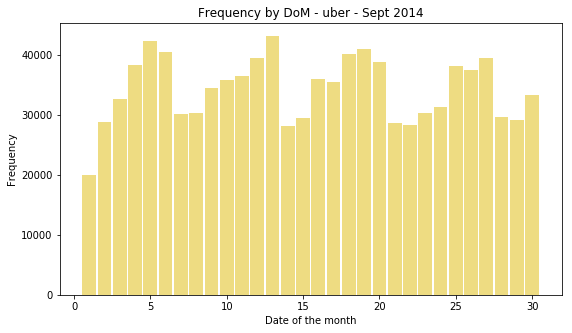

In [146]:
figure(figsize=(9, 5))
hist(data.dom, bins=30, rwidth=0.9, range=(0.5, 30.5), color = "#EEDC82")
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - uber - Sept 2014')
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

In [25]:
by_date.describe()

count       30.000000
mean     34271.200000
std       5465.103579
min      19961.000000
25%      29775.500000
50%      35045.500000
75%      38738.000000
max      43205.000000
dtype: float64

From this chart and statistics number above, we can find that numbers of different dates differ dramaticly with each other. The maximum number of record is on 13th. Sept which contains 43205 records. And that number is more than twice of the frequency in 1st. Sept which has the smallest number 19961. The average number of records of those 30 days is 34271.2

Meanwhile, we can see that frenency displays a periodic variation in a period of 7. So I guess they might contain some underlying rules regarding to weekdays. So let's move on!

##### - Weekday Analysis

([<matplotlib.axis.XTick at 0x1a21fc24e0>,
 <a list of 7 Text xticklabel objects>)

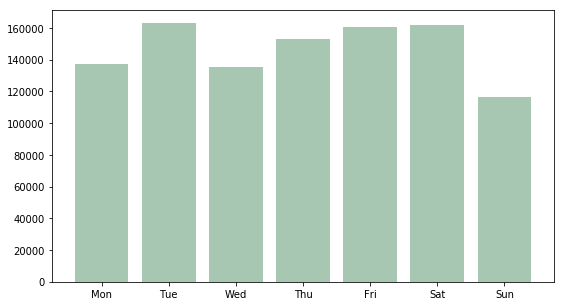

In [102]:
figure(figsize=(9, 5))
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#237341', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())


It is noteworthy that there are 5 Mondays and Tuesdays and rest of four weekdays only have 4 in September of 2014. So if we anaylze the frequency of different weekdays, we need to consider about the average frequency.

We can see that there were more than 150,000 trips recorded in total on all Satudays of September of 2014, which has the most frequency of all 7 weekdays. After calculting the average frequency of each weekday, I find that Monday and Sunday are the least frequence weekdays. And if we count Sunday as the beginning of one week, the frequency from Sunday to Saturday displays a general increasing trend.

##### - Hour Analysis

(array([ 16107.,  10702.,  10789.,  12675.,  20262.,  33307.,  43314.,
         44477.,  38542.,  37634.,  38821.,  39193.,  45042.,  52643.,
         61219.,  68224.,  73373.,  75040.,  69660.,  63988.,  60606.,
         51817.,  36568.,      0.]),
 array([  0.5       ,   1.47916667,   2.45833333,   3.4375    ,
          4.41666667,   5.39583333,   6.375     ,   7.35416667,
          8.33333333,   9.3125    ,  10.29166667,  11.27083333,
         12.25      ,  13.22916667,  14.20833333,  15.1875    ,
         16.16666667,  17.14583333,  18.125     ,  19.10416667,
         20.08333333,  21.0625    ,  22.04166667,  23.02083333,  24.        ]),
 <a list of 24 Patch objects>)

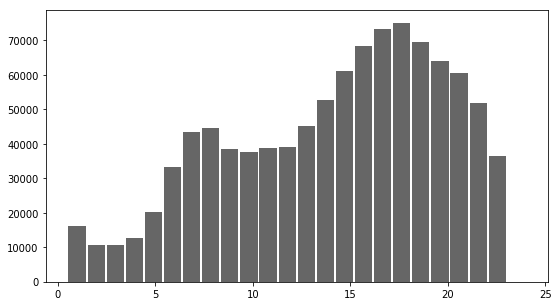

In [59]:
figure(figsize=(9, 5))
hist(data.hour, bins=24, rwidth = 0.9, range=(.5, 24), color='#666666')

From graphic above, we can see the global maximum appears around 18:00, which is over 70,000 and the global minmum appears around 2:00, which is around 10,000. Meanwhile, there is also a local maximum in the morning around 8 am on average.

Those facts coincidences my imagination. Both 8 am in the morning and 18:00 at dusk are rush hour, so no wonder there are local maximum of frequency on the graphics. And around 2 am in the moring, most of people have already fall asleep so it is the global minmum, which quite makes sense.

##### - Overall Heatmap

In [167]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

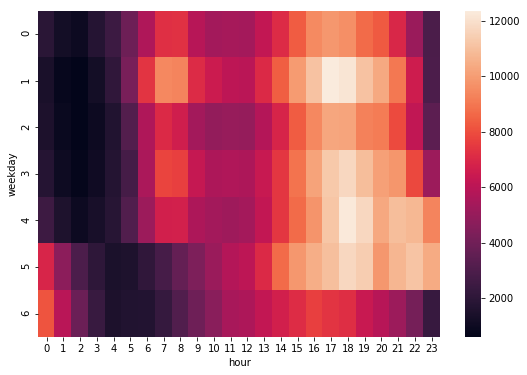

In [168]:
figure(figsize=(9, 6))
sns.heatmap(by_cross)

### Plots and Location Analysis

After the timing analysis, we have the roughly understanding of transit timing of New York citizens. Nevertheless, I want to figure out that where do people ususlly go by means of the coordinates of each record. Futhermore, I will combined the timing analsis to explore whether people prefer different places in different time, i.e. will people gather in different palces on workday and weekend? where are the most attactive places at midnight compared to the noon?

##### - General Location Map 

''

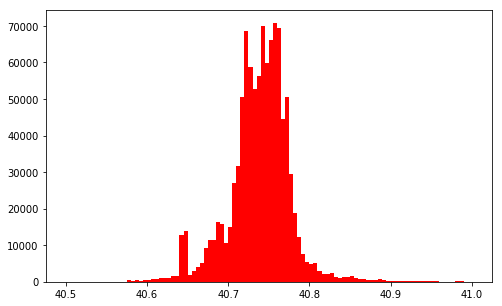

In [148]:
#First we got the latitude, which is represented as "Lat":
figure(figsize=(8, 5))
hist(data['Lat'], bins=100, range = (40.5, 41), color = 'r')
;

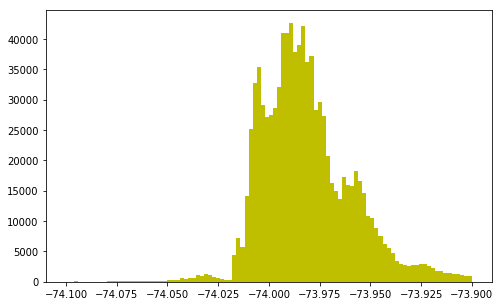

In [149]:
# Then we got the longtitude, which is represented as "Lon":
figure(figsize=(8, 5))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color = 'y');

''

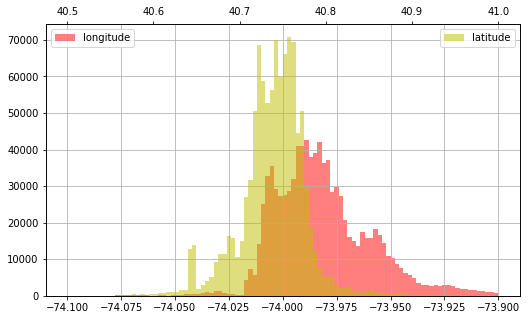

In [150]:
# Let's combined them together:
figure(figsize=(8.5, 5))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='r', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='y', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.58, 40.93)

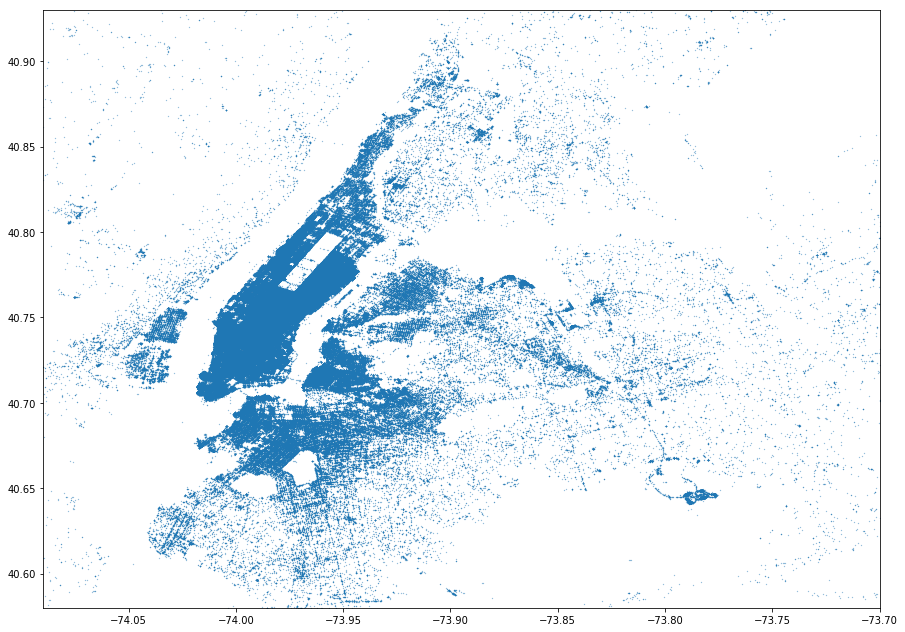

In [152]:
# Vey few people can image the plot map based on the charts above, so let's get the plot map below. Here we go:
figure(figsize=(15, 11))
plot(data['Lon'], data['Lat'], '.', ms=0.5, alpha=0.8)
xlim(-74.09, -73.7)
ylim(40.58, 40.93)

From this general location map, we can see a blurry map of whole New York City formed by around one million spots! The more spots in the map means the more people was taking uber there. 

Manhattan：There are at least 30% records taking in Manhattan, which has the most records amoung all districts of New York City. And the densest spots area in Manhattan includes Lower Manhattan, East Village, Midtown, Upper East Side, Upper West Side. And in Harlem and Upper Manhattan, the density of spots becomes smaller but still large compared with other districts in NYC.

Brookly, Queens, Bronx: There is a significant different in spots density for those areas in the map. For example, Brooklyn Height and Williamsburg area of Brooklyn (close to Manhattan) as well as Long Island City of Queens have the similar spots density with the average level of Manhattan. But most of areas have sparse spots and the trend is the futher away from Manhattan, the sparser spots in the maps. One exception in Queens is at the south east of the map —— John F. Kennedy International Airport.

Jersey City: Our records is about drivers who registerd in NYC, but since Jesrsy is directly cennected to NYC, there are also more or less spots shown in Jersey City. However, it cannot perfectly reflect the transit situation of Jersey City and it will be unfair to compare with New York City. Nevertheless, to some extent, it still accord with the rule above: the futher away from Manhattan, the sparser spots in the maps.

##### -Different Distribution in Different Weekdays

For this part, I would like to compare with the spots distribution difference between weekend and workday to explore whether people have different travelling habits. So here I choose Saturday and Thusday because they have similar records and thus can be compared fairly.

Text(0.5,1,'Saturday')

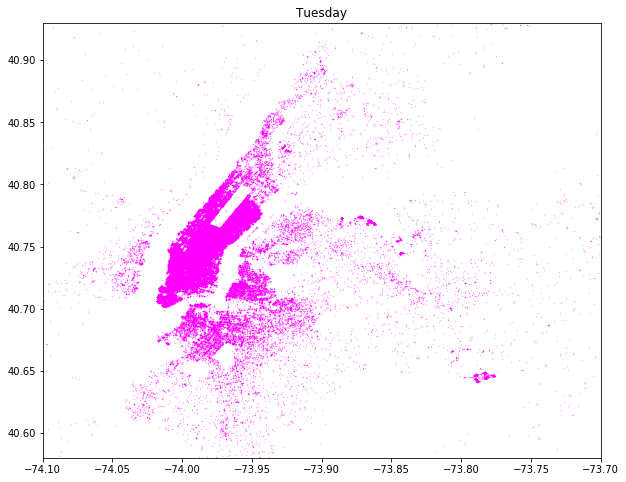

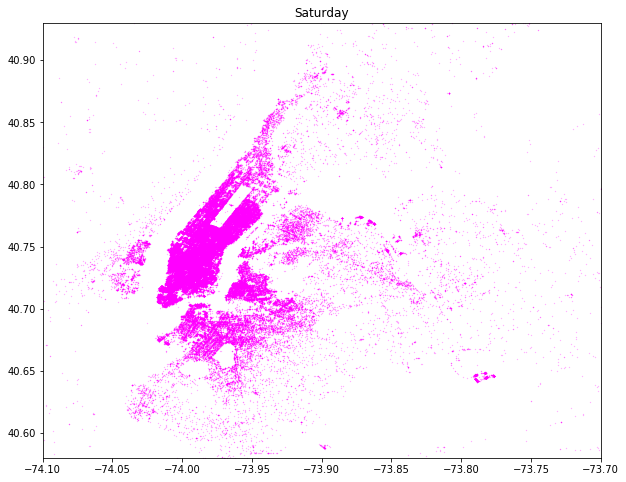

In [169]:
Tue = data[data['weekday']==1]
figure(figsize=(10, 8))
plot(Tue['Lon'], Tue['Lat'], '.', ms=0.5, alpha=0.5, color = "#FF00FF")
xlim(-74.1, -73.7)
ylim(40.58, 40.93)
title("Tuesday")
 
######################################################################
    
Sat = data[data['weekday']==5]
figure(figsize=(10, 8))
plot(Sat['Lon'], Sat['Lat'], '.', ms=0.5, alpha=0.5, color = "#FF00FF")
xlim(-74.1, -73.7)
ylim(40.58, 40.93)
title("Saturday")

From these two maps above, it's hard to tell the difference in Manhattan district, but if we looks closely, we can find a little bit difference in some areas. For example, more spots can be found around Leberty State Park and Historic Downtown of Jersy City, which are on the opposite bank of Lower Manhattan. What's more, the spots in the central of Brooklyn (Lon:-73.96, Lat: 40.64)becomes denser as well, where the Prospect Park Parade Ground always attracts many local citizens.

So we may conclude that compared with the distribution of workday, the spots at weekends become a little bit more disperse and the density of some tourist attraction will be larger to some extend. But the distribution of spots, as a whole, does not have too much difference.

#####  - Different Distribution in Different Time

For this part, I would like to compare with the spots distribution difference between noon and midnight to explore whether people have different travelling habits. And I am interested in which area is the most attractive area at midnight for local citizens. So here I choose 11am and 1am as example. Although they have different total number of records, we still can get something from this comparision. Now, Lets go!

Text(0.5,1,'Midnight')

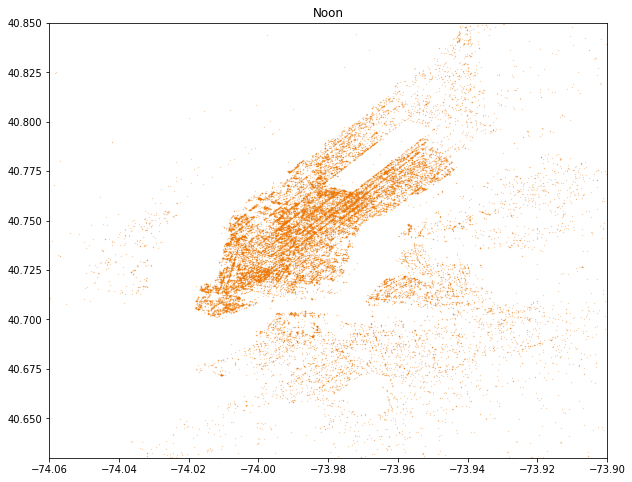

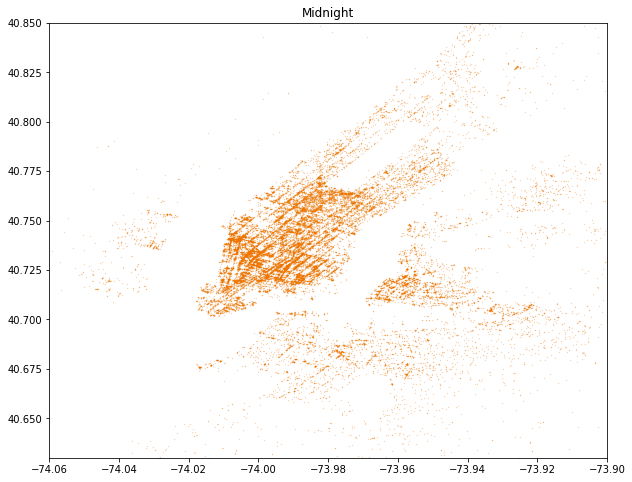

In [170]:
Noon = data[data['hour']==11]
figure(figsize=(10, 8))
plot(Noon['Lon'], Noon['Lat'], '.', ms=0.5, alpha=0.5, color = "#EE7600")
xlim(-74.06, -73.9)
ylim(40.63, 40.85)
title("Noon")

############################################################################

Midnight = data[data['hour']==23]
figure(figsize=(10, 8))
plot(Midnight['Lon'], Midnight['Lat'], '.', ms=0.5, alpha=0.5, color = "#EE7600")
xlim(-74.06, -73.9)
ylim(40.63, 40.85)
title("Midnight")

From these two maps, we can clearly distinguish that for most areas of New York City, the spots distribution becomes disperse. One great example can be here is Upper East Side area of Manhattan. 

However, there are few areas have similar and even denser spots distribution, including Lower Manhattan, Midtown of Manhattan and Williamsburg area. One main reason here is those places have variegated night life and you can find crowded bars and clubs easily in those areas even at midnight. On the other hand, midnight might be off hour for some companys, the bulge bracket in Wall Street of Lower Manhattan could be a great example :(

### Conclusion

For this project, I imported the dataset about uber record of September 2014 in New York City from website FiveThirtyEight so that I could explore the life habits of local citizens after several steps of processing.

On the one hand, I focused on the timing and frequency and divided into three parts: Date of Month, Weekday, Honor. And thus I got the following conclusion:

    • The frequency varies dramaticly on different date. The most number of record can be twice of the least;
    • The frequency from Sunday to Saturday displays a general increasing trend. Sunday and Monday has the lesat frequency while Saturday has the most;
    • Both 8 am and 6 pm are rush hour of NYC, so that would be rush hours and have the local maximum. Also 2 am is the global minmum while 6pm is the global maximum. 

On the other hand, I focused on the location spot and location analysis and combined it with timing analysis. First of all, I made several graphics to show the statistics of longtitute and latitude and then draw a general map by means of the set of those plots. After comparision and analysis, I got the following conclusion:

    • Manhattan has the most records amoung all districts of New York City. And the densest spots area in Manhattan includes Lower Manhattan, East Village, Midtown, Upper East Side, Upper West Side, etc. There is a significant different in spots density for those Brooklyn, Queens, Bronx, Jersy City in the map;
    • Compared with the distribution of workday, the spots at weekends become a little bit more disperse and the density of some tourist attraction will be larger to some extend. But the distribution of spots, as a whole, does not have too much difference;
    • Compared with noon, most areas of New York City, the spots distribution becomes disperse at night except for some areas, where the variegated night life still attracted lots of local citizens.

### The End. Thanks